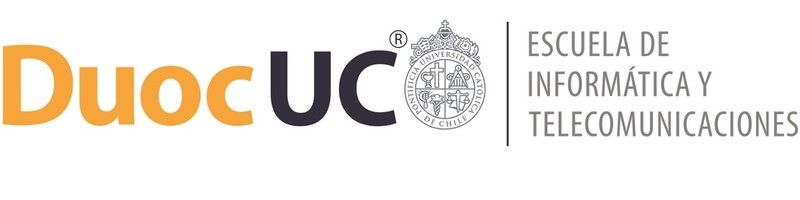

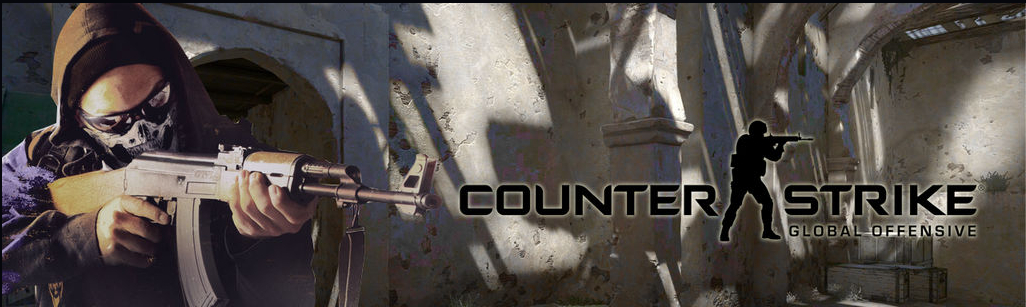

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Marcelo Soto
* ChatGPT

Docente: Profe Gio    

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

# **Contexto de Negocio: CS:GO y el Valor de las Estadísticas**

**Counter-Strike: Global Offensive (CS:GO)** es un videojuego de disparos en primera persona de tipo competitivo, donde dos equipos —*Terroristas* y *Antiterroristas*— compiten en rondas por cumplir objetivos como plantar/desactivar una bomba o eliminar al equipo contrario.

Cada jugador participa en múltiples rondas dentro de una partida (*MatchId*), y su rendimiento se mide a través de estadísticas detalladas por ronda y jugador.

Este conjunto de datos incluye variables como:
* Tipo de arma utilizada
* Daño causado
* Kills, headshots y asistencias
* Distancia recorrida
* Uso de granadas, entre otras

Estas estadísticas pueden ser aprovechadas para múltiples fines:
* 📊 **Optimización del rendimiento individual y del equipo**
* 🧠 **Desarrollo de sistemas de inteligencia artificial realistas o entrenadores virtuales**
* 🔍 **Detección de trampas o partidas manipuladas**
* 🛠️ **Creación de motores de recomendación personalizados (armas, estrategias)**
* 💵 **Análisis predictivo para apuestas, scouting de jugadores, entre otros modelos de monetización**

Estas estadísticas son útiles tanto para equipos profesionales como para motores de recomendación o detección de comportamiento anómalo.

---

# **Hipótesis de Negocio**

A partir de los datos disponibles, se pueden definir problemas tanto de regresión como de clasificación.

## Hipótesis para Tareas de Regresión

* “A mayor distancia recorrida (TravelledDistance_m), mayor tiempo de supervivencia (TimeAlive_imputed_seconds) en la misma ronda.”

H₀ (nula): β₁ = 0 (no hay relación). H₁ (alternativa): β₁ > 0 (relación positiva).


---


---

# **Relación con Contenidos de la Asignatura**


Este caso práctico permite aplicar los conceptos abordados en el curso, tales como:

* **Modelado de regresión**  
  Para predecir variables numéricas como `TimeAlive` o `MatchKills`.

* **Preprocesamiento de datos**  
  Limpieza, manejo de valores nulos, codificación de variables categóricas, normalización.

* **Selección de atributos relevantes**  
  Uso de técnicas como correlación, `RandomForestFeatureImportance`, análisis de varianza (ANOVA), entre otras.

* **Evaluación de modelos**  
  * Regresión: `MAE`, `RMSE`, `R²`  
  * Clasificación: `Accuracy`, `Precision`, `Recall`, `F1-score`, `Matriz de Confusión`

* **Detección de anomalías y outliers**  
  Identificación de partidas fuera del comportamiento normal, posible trampa o manipulación.


In [ ]:
#Importa librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

palette = sns.color_palette("Set2")

from google.colab import files
uploaded = files.upload()

original_filename = list(uploaded.keys())[0]
print(f"Nombre original del archivo: {original_filename}")

# Renombrar a algo más simple
new_filename = "csgo_dataset.csv"
os.rename(original_filename, new_filename)

# Cargar el dataset
df_modified = pd.read_csv(new_filename, engine='python')
df_modified.info()

Saving df_modified limpio.csv to df_modified limpio.csv
Nombre original del archivo: df_modified limpio.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   PlayerID                     79157 non-null  int64 
 1   Map                          79157 non-null  object
 2   InternalTeamId               79157 non-null  int64 
 3   MatchId                      79157 non-null  int64 
 4   RoundId                      79157 non-null  int64 
 5   RoundHeadshots               79157 non-null  int64 
 6   RoundFlankKills              79157 non-null  int64 
 7   RoundStartingEquipmentValue  79157 non-null  int64 
 8   TeamStartingEquipmentValue   79157 non-null  int64 
 9   Tiempo                       79157 non-null  int64 
 10  Distancia                    79157 non-null  int64 
 11  Participacion_Kills          79157 no

In [ ]:
df_modified.head(10)

,PlayerID,Map,InternalTeamId,MatchId,RoundId,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,Tiempo,Distancia,Participacion_Kills,Granadas
0,600,inferno,1,4,1,0,0,750,4400,45,100,0,4
1,601,inferno,1,4,1,0,0,800,4400,43,88,0,0
2,602,inferno,1,4,1,0,0,1000,4400,37,56,0,0
3,603,inferno,1,4,1,0,0,850,4400,47,89,0,0
4,604,inferno,1,4,1,0,0,1000,4400,53,108,0,2
5,605,inferno,2,4,1,0,0,850,3750,53,78,0,0
6,606,inferno,2,4,1,0,0,400,3750,53,80,0,2
7,607,inferno,2,4,1,0,0,800,3750,53,68,1,0
8,608,inferno,2,4,1,1,1,850,3750,53,87,3,0
9,609,inferno,2,4,1,2,0,850,3750,53,78,2,0


## Fase 2: Regresion Multiple

> Tiempo vs Distancia y Participacion Kills



=== Regresión Múltiple 1: (Distancia, RoundKills) → Tiempo ===
MAE  : 20.96 s   |   MSE  : 693.18   |   RMSE : 26.33 s   |   R² : 0.0933

=== Regresión Múltiple 2: (Distancia, RoundKills, RoundFlankKills) → Tiempo ===
MAE  : 20.96 s   |   MSE  : 693.19   |   RMSE : 26.33 s   |   R² : 0.0932



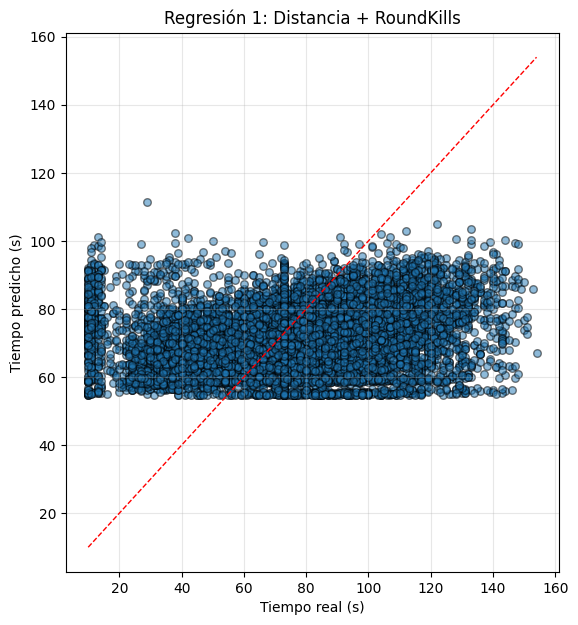

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ——————————————————————————————————————————————————————
# 1) Definir predictores y objetivo (como en tu código original)
# ——————————————————————————————————————————————————————
predictors_1 = ['Distancia', 'RoundKills']
predictors_2 = ['Distancia', 'RoundKills', 'RoundFlankKills']
target = 'Tiempo'

# ——————————————————————————————————————————————————————
# 2) Eliminar filas con NaN en cualquiera de las columnas necesarias
# ——————————————————————————————————————————————————————
df_eval = df_modified.dropna(subset=predictors_1 + predictors_2 + [target]).copy()

# ——————————————————————————————————————————————————————
# 3) Preparar X e y para ambas regresiones
# ——————————————————————————————————————————————————————
X1 = df_eval[predictors_1].values
y1 = df_eval[target].values

X2 = df_eval[predictors_2].values
y2 = df_eval[target].values

# ——————————————————————————————————————————————————————
# 4) Función para entrenar y devolver resultados
# ——————————————————————————————————————————————————————
def evaluar_regresion(X, y, test_size=0.20, random_state=42):
    # Dividir
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    # Ajustar modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Predecir
    y_pred = model.predict(X_test)
    # Métricas
    mae  = mean_absolute_error(y_test, y_pred)
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_test, y_pred)
    # Devolver todos los valores necesarios
    return {
        'modelo': model,
        'X_train': X_train, 'X_test': X_test,
        'y_train': y_train, 'y_test': y_test,
        'y_pred': y_pred,
        'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2
    }

# ——————————————————————————————————————————————————————
# 5) Entrenar ambas regresiones
# ——————————————————————————————————————————————————————
result1 = evaluar_regresion(X1, y1)
result2 = evaluar_regresion(X2, y2)

# Imprimir rápidamente las métricas de cada modelo
print("=== Regresión Múltiple 1: (Distancia, RoundKills) → Tiempo ===")
print(f"MAE  : {result1['MAE']:.2f} s   |   MSE  : {result1['MSE']:.2f}   |   RMSE : {result1['RMSE']:.2f} s   |   R² : {result1['R2']:.4f}\n")
# ——————————————————————————————————————————————————————
# 6) Graficar Parity Plots en un tamaño grande (14×7)
# ——————————————————————————————————————————————————————
y_test_1 = result1['y_test']
y_pred_1 = result1['y_pred']
y_test_2 = result2['y_test']
y_pred_2 = result2['y_pred']

# Rango común para la línea y=x
y_min = min(y_test_1.min(), y_pred_1.min(), y_test_2.min(), y_pred_2.min())
y_max = max(y_test_1.max(), y_pred_1.max(), y_test_2.max(), y_pred_2.max())
parity_line = [y_min, y_max]

plt.figure(figsize=(14, 7))

# — Regresión 1 —
plt.subplot(1, 2, 1)
plt.scatter(y_test_1, y_pred_1,
            color='tab:blue', alpha=0.5, edgecolor='k', s=30)
plt.plot(parity_line, parity_line,
         color='red', linestyle='--', linewidth=1)
plt.xlabel("Tiempo real (s)")
plt.ylabel("Tiempo predicho (s)")
plt.title("Regresión 1: Distancia + RoundKills")
plt.grid(alpha=0.3)


plt.show()


=== Métricas Regresión Múltiple (Distancia + Participacion_Kills) ===
RMSE: 26.36 segundos
MAE : 20.97 segundos
R²  : 0.0908

Coeficientes (pendientes):
  Distancia          : 0.1626 seg/m
  Participacion_Kills: 3.3584 seg/kill-participation
Intercepto           : 52.70 segundos


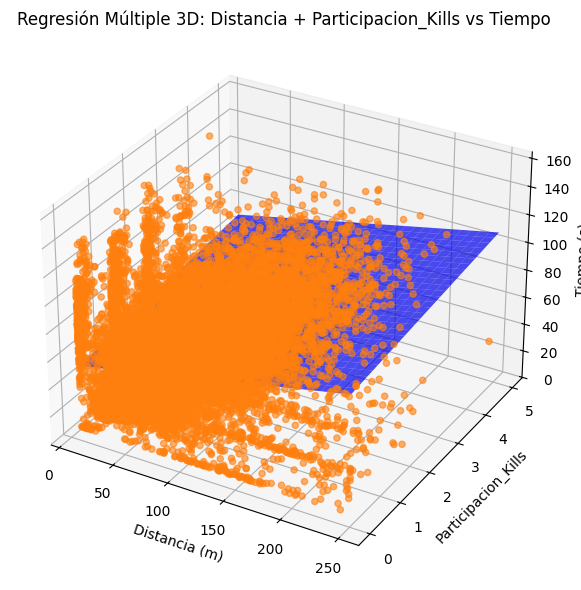

In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suponiendo que ya tienes cargado tu DataFrame como df_modified,
# si no, descomenta la línea siguiente y ajusta la ruta al CSV:
# df_modified = pd.read_csv('ruta/a/df_modified.csv')

# 1) Definir X e y usando Distancia y Participacion_Kills
X = df_modified[['Distancia', 'Participacion_Kills']].values
y = df_modified['Tiempo'].values

# 2) Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# 3) Ajustar regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 5) Calcular métricas de desempeño
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== Métricas Regresión Múltiple (Distancia + Participacion_Kills) ===")
print(f"RMSE: {rmse:.2f} segundos")
print(f"MAE : {mae:.2f} segundos")
print(f"R²  : {r2:.4f}")

# 6) Mostrar coeficientes e intercepto
coefs = model.coef_
intercept = model.intercept_

print("\nCoeficientes (pendientes):")
print(f"  Distancia          : {coefs[0]:.4f} seg/m")
print(f"  Participacion_Kills: {coefs[1]:.4f} seg/kill-participation")
print(f"Intercepto           : {intercept:.2f} segundos")

 #7) Graficar en 3D: valores reales vs. predichos y plano de regresión
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter de los datos de prueba (Distancia, Participacion_Kills, Tiempo real)
ax.scatter(
    X_test[:, 0],               # Distancia en X
    X_test[:, 1],               # Participacion_Kills en Y
    y_test,                     # Tiempo real en Z
    c='tab:orange', alpha=0.6, s=20, label='Datos reales'
)

# Crear malla para Distancia y Participacion_Kills
dist_range = np.linspace(df_modified['Distancia'].min(), df_modified['Distancia'].max(), 30)
kill_range = np.linspace(df_modified['Participacion_Kills'].min(), df_modified['Participacion_Kills'].max(), 30)
D, P = np.meshgrid(dist_range, kill_range)

# Calcular predicciones del plano para cada par (Distancia, Participacion_Kills)
coords = np.column_stack([D.ravel(), P.ravel()])
Z = model.predict(coords).reshape(D.shape)

# Dibujar superficie del plano de regresión (Distancia + Participacion_Kills → Tiempo)
ax.plot_surface(
    D, P, Z,
    color='blue', alpha=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True
)

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Participacion_Kills')
ax.set_zlabel('Tiempo (s)')
ax.set_title('Regresión Múltiple 3D: Distancia + Participacion_Kills vs Tiempo')

plt.tight_layout()
plt.show()


RMSE: Mide el error promedio de predicción al cuadrado, aproxima la desviación típica de errores (26.36 s).

MAE: Promedio de diferencias absolutas entre tiempos reales y predichos (20.97 s).

R²: Fracción de variación de “Tiempo” explicada por el modelo (0.0908).

Coef. Distancia: Incremento estimado de “Tiempo” por cada metro adicional recorrido (0.1626 seg/m).

Coef. Participacion_Kills: Aumento en “Tiempo” por cada punto de participación en kills (3.3584 seg/kill).

Intercepto: Tiempo estimado cuando Distancia y Participacion_Kills son cero (52.70 s).

Tiempo vs Distancia y Granadas

=== Métricas Regresión Múltiple (Distancia + Granadas) ===
RMSE: 25.63 segundos
MAE : 20.24 segundos
R²  : 0.1406

Coeficientes (pendientes):
  Distancia : 0.1380 seg/m
  Granadas  : 4.9222 seg/por granada
Intercepto  : 48.99 segundos


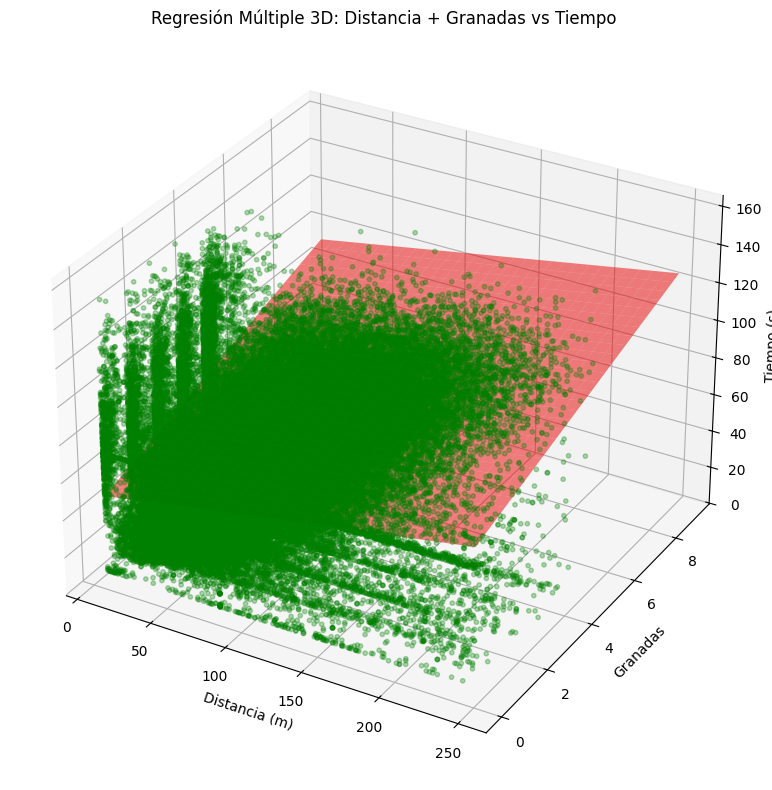

In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D  # para graficar en 3D

# 1) Definir X e y usando Distancia y Granadas
X = df_modified[['Distancia', 'Granadas']].values
y = df_modified['Tiempo'].values

# 2) Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# 3) Ajustar la regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 5) Calcular métricas de desempeño
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== Métricas Regresión Múltiple (Distancia + Granadas) ===")
print(f"RMSE: {rmse:.2f} segundos")
print(f"MAE : {mae:.2f} segundos")
print(f"R²  : {r2:.4f}")

# 6) Mostrar coeficientes e intercepto
coefs = model.coef_
intercept = model.intercept_

print("\nCoeficientes (pendientes):")
print(f"  Distancia : {coefs[0]:.4f} seg/m")
print(f"  Granadas  : {coefs[1]:.4f} seg/por granada")
print(f"Intercepto  : {intercept:.2f} segundos")

# 7) Graficar en 3D: puntos reales y plano de regresión
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter de todos los puntos reales
ax.scatter(
    df_modified['Distancia'],
    df_modified['Granadas'],
    df_modified['Tiempo'],
    c='green', alpha=0.3, s=10, label='Datos reales'
)

# Crear malla para Distancia y Granadas
dist_range = np.linspace(df_modified['Distancia'].min(), df_modified['Distancia'].max(), 30)
granada_range = np.linspace(df_modified['Granadas'].min(), df_modified['Granadas'].max(), 30)
D, G = np.meshgrid(dist_range, granada_range)

# Calcular predicciones del plano para cada par (Distancia, Granadas)
coords = np.column_stack([D.ravel(), G.ravel()])
Z = model.predict(coords).reshape(D.shape)

# Dibujar superficie del plano de regresión
ax.plot_surface(
    D, G, Z,
    color='red', alpha=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True
)

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Granadas')
ax.set_zlabel('Tiempo (s)')
ax.set_title('Regresión Múltiple 3D: Distancia + Granadas vs Tiempo')

plt.tight_layout()
plt.show()


RMSE: Se redujo (25.63 vs 26.36), mostrando ajuste ligeramente mejor al incluir Granadas.

MAE: También disminuyó (20.24 vs 20.97), lo que indica predicciones marginalmente más precisas.

R²: Aumentó notablemente (0.1406 vs 0.0908), explicando mayor varianza del tiempo.

Coef. Distancia: Bajó (0.1380 vs 0.1626), implica menor impacto de distancia en tiempo.

Coef. Granadas vs Participacion_Kills: Coef. granadas mayor (4.9222 vs 3.3584), sugiere influencia más fuerte que kills.

Intercepto: Más bajo (48.99 vs 52.70), refleja menor tiempo base estimado con variables en cero.

Tiempo vs Distancia y RoundStartingEquipmentValue

=== Métricas Regresión Múltiple (Distancia + RoundStartingEquipmentValue) ===
RMSE: 26.23 segundos
MAE : 20.75 segundos
R²  : 0.1003

Coeficientes (pendientes):
  Distancia                    : 0.1630 seg/m
  RoundStartingEquipmentValue  : 0.0020 seg/por valor inicial de ronda
Intercepto                     : 47.71 segundos


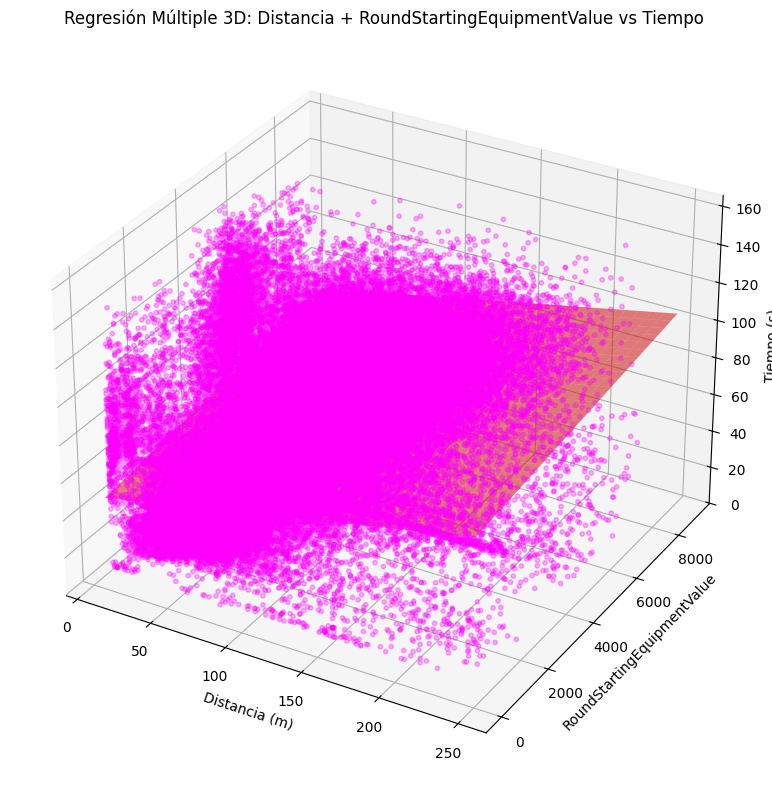

In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D  # para graficar en 3D

# Si aún no has cargado df_modified, descomenta y ajusta la ruta:
# import pandas as pd
# df_modified = pd.read_csv('/ruta/a/df_modified_limpio.csv')

# 1) Definir X e y usando Distancia y RoundStartingEquipmentValue
X = df_modified[['Distancia', 'RoundStartingEquipmentValue']].values
y = df_modified['Tiempo'].values

# 2) Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# 3) Ajustar la regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 5) Calcular métricas de desempeño
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== Métricas Regresión Múltiple (Distancia + RoundStartingEquipmentValue) ===")
print(f"RMSE: {rmse:.2f} segundos")
print(f"MAE : {mae:.2f} segundos")
print(f"R²  : {r2:.4f}")

# 6) Mostrar coeficientes e intercepto
coefs = model.coef_
intercept = model.intercept_

print("\nCoeficientes (pendientes):")
print(f"  Distancia                    : {coefs[0]:.4f} seg/m")
print(f"  RoundStartingEquipmentValue  : {coefs[1]:.4f} seg/por valor inicial de ronda")
print(f"Intercepto                     : {intercept:.2f} segundos")

# 7) Graficar en 3D: puntos reales y plano de regresión
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter de todos los puntos reales
ax.scatter(
    df_modified['Distancia'],
    df_modified['RoundStartingEquipmentValue'],
    df_modified['Tiempo'],
    c='magenta', alpha=0.3, s=10, label='Datos reales'
)

# Crear malla para Distancia y RoundStartingEquipmentValue
dist_range = np.linspace(df_modified['Distancia'].min(), df_modified['Distancia'].max(), 30)
round_eq_range = np.linspace(df_modified['RoundStartingEquipmentValue'].min(), df_modified['RoundStartingEquipmentValue'].max(), 30)
D, R = np.meshgrid(dist_range, round_eq_range)

# Calcular predicciones del plano para cada par (Distancia, RoundStartingEquipmentValue)
coords = np.column_stack([D.ravel(), R.ravel()])
Z = model.predict(coords).reshape(D.shape)

# Dibujar superficie del plano de regresión
ax.plot_surface(
    D, R, Z,
    color='red', alpha=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True
)

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('RoundStartingEquipmentValue')
ax.set_zlabel('Tiempo (s)')
ax.set_title('Regresión Múltiple 3D: Distancia + RoundStartingEquipmentValue vs Tiempo')

plt.tight_layout()
plt.show()


Tiempo vs Distancia y TeamStartingEquipmentValue

=== Métricas Regresión Múltiple (Distancia + TeamStartingEquipmentValue) ===
RMSE: 26.20 segundos
MAE : 20.72 segundos
R²  : 0.1019

Coeficientes (pendientes):
  Distancia                   : 0.1620 seg/m
  TeamStartingEquipmentValue  : 0.0005 seg/por valor de equipo
Intercepto                    : 46.66 segundos


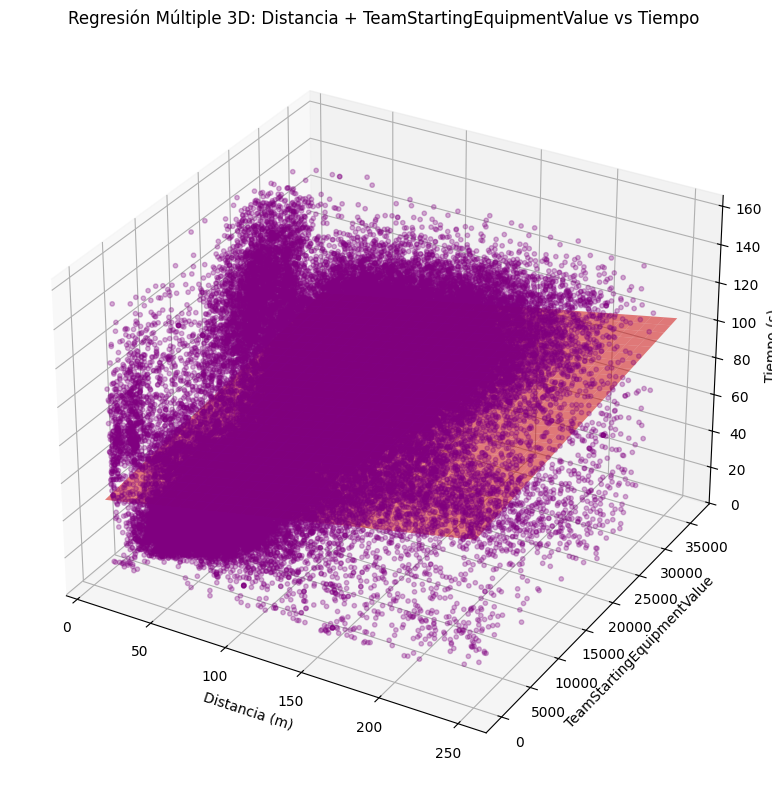

In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D  # para graficar en 3D

# 1) Definir X e y usando Distancia y TeamStartingEquipmentValue
X = df_modified[['Distancia', 'TeamStartingEquipmentValue']].values
y = df_modified['Tiempo'].values

# 2) Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# 3) Ajustar la regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 5) Calcular métricas de desempeño
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== Métricas Regresión Múltiple (Distancia + TeamStartingEquipmentValue) ===")
print(f"RMSE: {rmse:.2f} segundos")
print(f"MAE : {mae:.2f} segundos")
print(f"R²  : {r2:.4f}")

# 6) Mostrar coeficientes e intercepto
coefs = model.coef_
intercept = model.intercept_

print("\nCoeficientes (pendientes):")
print(f"  Distancia                   : {coefs[0]:.4f} seg/m")
print(f"  TeamStartingEquipmentValue  : {coefs[1]:.4f} seg/por valor de equipo")
print(f"Intercepto                    : {intercept:.2f} segundos")

# 7) Graficar en 3D: puntos reales y plano de regresión
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter de todos los puntos reales
ax.scatter(
    df_modified['Distancia'],
    df_modified['TeamStartingEquipmentValue'],
    df_modified['Tiempo'],
    c='purple', alpha=0.3, s=10, label='Datos reales'
)

# Crear malla para Distancia y TeamStartingEquipmentValue
dist_range = np.linspace(df_modified['Distancia'].min(), df_modified['Distancia'].max(), 30)
equip_range = np.linspace(df_modified['TeamStartingEquipmentValue'].min(), df_modified['TeamStartingEquipmentValue'].max(), 30)
D, E = np.meshgrid(dist_range, equip_range)

# Calcular predicciones del plano para cada par (Distancia, TeamStartingEquipmentValue)
coords = np.column_stack([D.ravel(), E.ravel()])
Z = model.predict(coords).reshape(D.shape)

# Dibujar superficie del plano de regresión
ax.plot_surface(
    D, E, Z,
    color='red', alpha=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True
)

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('TeamStartingEquipmentValue')
ax.set_zlabel('Tiempo (s)')
ax.set_title('Regresión Múltiple 3D: Distancia + TeamStartingEquipmentValue vs Tiempo')

plt.tight_layout()
plt.show()


RMSE: Aumentó (26.20 vs 25.63), indicando ajuste peor que con Granadas.

MAE: Aumentó (20.72 vs 20.24), predicciones ligeramente menos precisas.

R²: Disminuyó (0.1019 vs 0.1406), menor varianza explicada.

Coef. Distancia: Subió (0.1620 vs 0.1380), mayor efecto de distancia.

Coef. Equipo vs Granadas: Muy bajo (0.0005 vs 4.9222), casi sin efecto.

Intercepto: Más bajo (46.66 vs 48.99), menor tiempo base estimado.

Tiempo vs Distancia, Granadas, Participacion_Kills y TeamStartingEquipmentValue

=== Métricas Regresión Múltiple (Distancia + Granadas + Participacion_Kills + TeamStartingEquipmentValue) ===
RMSE: 25.52 segundos
MAE : 20.13 segundos
R²  : 0.1480

Coeficientes (pendientes):
  Distancia                  : 0.1368 seg/m
  Granadas                   : 4.3789 seg/por granada
  Participacion_Kills        : 1.9442 seg/kill-participation
  TeamStartingEquipmentValue : 0.00010001 seg/por valor de equipo
Intercepto                   : 46.58 segundos


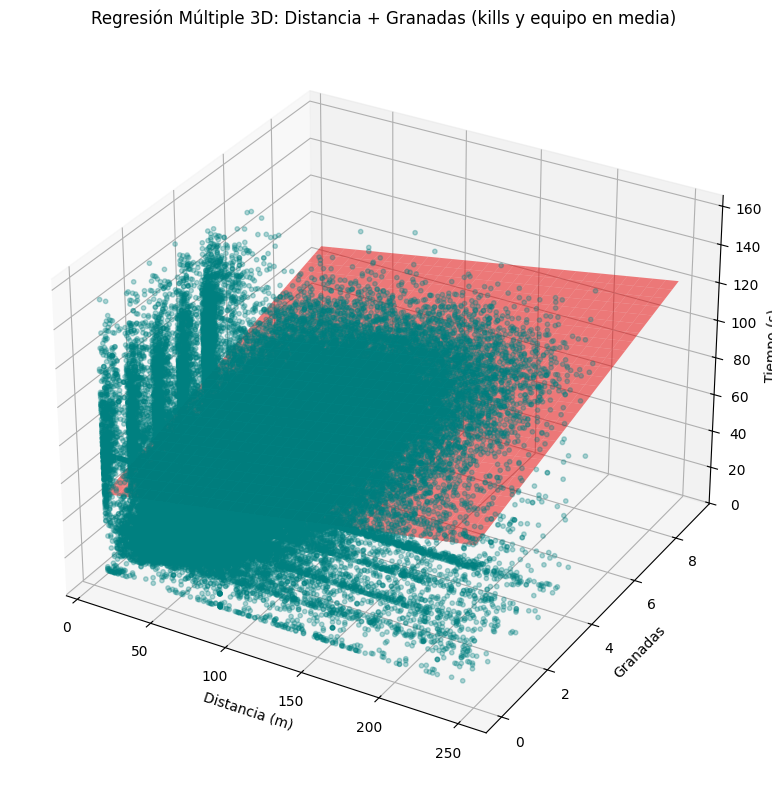

In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D  # Para graficar en 3D

# 1) Definir X e y usando Distancia, Granadas, Participacion_Kills y TeamStartingEquipmentValue
X = df_modified[['Distancia', 'Granadas', 'Participacion_Kills', 'TeamStartingEquipmentValue']].values
y = df_modified['Tiempo'].values

# 2) Dividir en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# 3) Ajustar la regresión lineal múltiple con las cuatro variables
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 5) Calcular métricas de desempeño
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== Métricas Regresión Múltiple (Distancia + Granadas + Participacion_Kills + TeamStartingEquipmentValue) ===")
print(f"RMSE: {rmse:.2f} segundos")
print(f"MAE : {mae:.2f} segundos")
print(f"R²  : {r2:.4f}")

# 6) Mostrar coeficientes e intercepto
coefs = model.coef_
intercept = model.intercept_

print("\nCoeficientes (pendientes):")
print(f"  Distancia                  : {coefs[0]:.4f} seg/m")
print(f"  Granadas                   : {coefs[1]:.4f} seg/por granada")
print(f"  Participacion_Kills        : {coefs[2]:.4f} seg/kill-participation")
print(f"  TeamStartingEquipmentValue : {coefs[3]:.8f} seg/por valor de equipo")
print(f"Intercepto                   : {intercept:.2f} segundos")

# 7) Graficar en 3D: puntos reales y superficie predictiva
# Para visualizar en 3D, elegimos dos variables como ejes (ej. Distancia y Granadas),
# y fijamos las otras dos al valor promedio de todo el conjunto.

# Calcular medias de Participacion_Kills y TeamStartingEquipmentValue
mean_kills = df_modified['Participacion_Kills'].mean()
mean_equip = df_modified['TeamStartingEquipmentValue'].mean()

# Crear malla para Distancia y Granadas
dist_range = np.linspace(df_modified['Distancia'].min(), df_modified['Distancia'].max(), 30)
gran_range = np.linspace(df_modified['Granadas'].min(), df_modified['Granadas'].max(), 30)
D, G = np.meshgrid(dist_range, gran_range)

# Construir matriz de predicción usando la malla y las medias
# Cada punto del plano: [Distancia, Granadas, mean_kills, mean_equip]
coords = np.column_stack([
    D.ravel(),
    G.ravel(),
    np.full(D.size, mean_kills),
    np.full(D.size, mean_equip)
])
Z = model.predict(coords).reshape(D.shape)

# Graficar en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter de todos los puntos reales (Distancia, Granadas, Tiempo real)
ax.scatter(
    df_modified['Distancia'],
    df_modified['Granadas'],
    df_modified['Tiempo'],
    c='teal', alpha=0.3, s=10, label='Datos reales'
)

# Superficie del hiperplano de regresión (con kills y equipo en su media)
ax.plot_surface(
    D, G, Z,
    color='red', alpha=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True
)

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Granadas')
ax.set_zlabel('Tiempo (s)')
ax.set_title('Regresión Múltiple 3D: Distancia + Granadas (kills y equipo en media)')

plt.tight_layout()
plt.show()
